# Bank Marketing 

In [60]:
#Importing liabraries
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV

In [61]:
#importing and loading datasets 
df=pd.read_csv("F:\\Data Science\\FlipRobo\\Project 5, 6 & 7\\termdeposit_train.csv")

In [62]:
df.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [63]:
#Created another dataframe to drop column 'duration'
#df=df.drop(['duration'],axis=1)

In [64]:
df.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [65]:
# No. of columns and rows
print(df.shape)

(31647, 18)


In [66]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [68]:
#To know unque values of the column 'age'
df.age.unique()

array([56, 31, 27, 57, 33, 50, 45, 35, 36, 44, 39, 43, 41, 53, 64, 48, 60,
       29, 30, 42, 46, 32, 63, 47, 49, 52, 68, 26, 58, 38, 54, 40, 59, 24,
       37, 34, 61, 55, 20, 69, 25, 62, 22, 51, 28, 70, 66, 23, 87, 71, 74,
       81, 73, 76, 72, 84, 19, 79, 75, 21, 83, 80, 67, 18, 77, 65, 82, 86,
       78, 88, 92, 95, 93, 89, 94, 90], dtype=int64)

In [69]:
#To know unique values in the rest of the columns
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
marital
['married' 'divorced' 'single']
education
['unknown' 'secondary' 'tertiary' 'primary']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['telephone' 'cellular' 'unknown']
month
['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
poutcome
['unknown' 'success' 'failure' 'other']
subscribed
['no' 'yes']


In [70]:
for column in df.columns:
    print(column,df[column].nunique())

ID 31647
age 76
job 12
marital 3
education 4
default 2
balance 6326
housing 2
loan 2
contact 3
day 31
month 12
duration 1454
campaign 45
pdays 509
previous 38
poutcome 4
subscribed 2


In [71]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [72]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

In [73]:
for feature in categorical_features:
   
    print('The feature {} and number of categories  {}'.format(feature,len(df[feature].unique())))

The feature job and number of categories  12
The feature marital and number of categories  3
The feature education and number of categories  4
The feature default and number of categories  2
The feature housing and number of categories  2
The feature loan and number of categories  2
The feature contact and number of categories  3
The feature month and number of categories  12
The feature poutcome and number of categories  4
The feature subscribed and number of categories  2


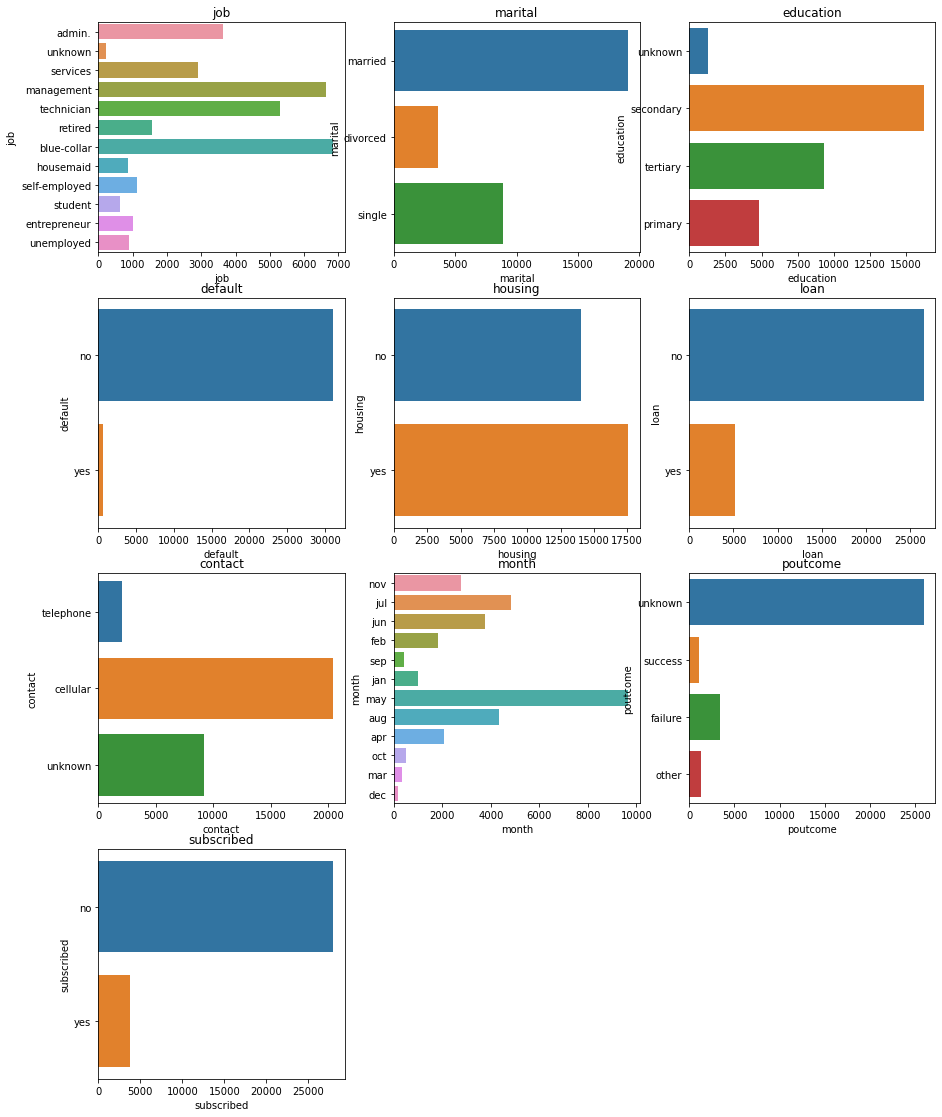

In [74]:
plt.figure(figsize=(15,60), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()


In [75]:
df=df.rename(columns={'y':'deposit'})

<AxesSubplot:>

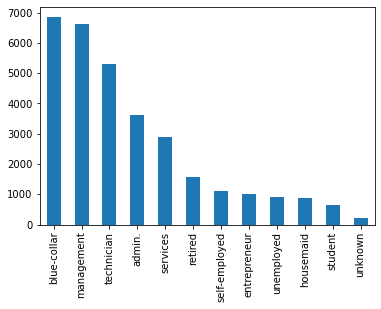

In [76]:
df['job'].value_counts().plot.bar()

Bivarate Analysis

<AxesSubplot:xlabel='job,subscribed'>

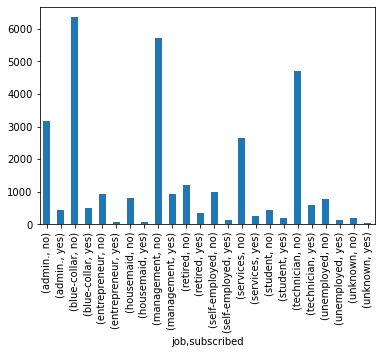

In [77]:
df.groupby('job')['subscribed'].value_counts().plot.bar()

Bar plot shows how many people are subscribed in each job category 

<AxesSubplot:xlabel='default,subscribed'>

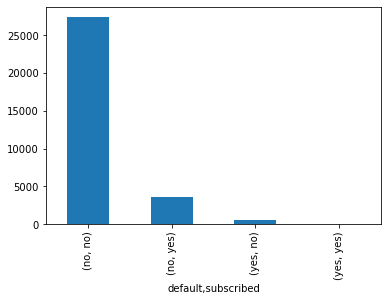

In [78]:
df.groupby('default')['subscribed'].value_counts().plot.bar()

From the above (default, subscribed) we can infer that the client who has no previous default is more likely to subscribe than the client who is having previous default.

In [79]:
df1=pd.read_csv("F:\\Data Science\\FlipRobo\\Project 5, 6 & 7\\termdeposit_test.csv")

In [80]:
df1.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [81]:
#Created another dataframe to drop column 'duration'
#df1=df1.drop(['duration'],axis=1)

In [82]:
df1.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [83]:
# Replace yes with 1 and no with 0
df['subscribed'].replace('no', 0, inplace = True)
df['subscribed'].replace('yes', 1, inplace = True)

In [84]:
corr = df[['age', 'balance', 'day', 'pdays', 'previous', 'subscribed']].corr()
corr

,age,balance,day,pdays,previous,subscribed
age,1.000000,0.103245,-0.011056,-0.021947,0.005761,0.024538
balance,0.103245,1.000000,0.003461,0.001789,0.013843,0.050807
day,-0.011056,0.003461,1.000000,-0.087626,-0.048752,-0.029600
pdays,-0.021947,0.001789,-0.087626,1.000000,0.428938,0.108290
previous,0.005761,0.013843,-0.048752,0.428938,1.000000,0.088081
subscribed,0.024538,0.050807,-0.029600,0.108290,0.088081,1.000000


<AxesSubplot:>

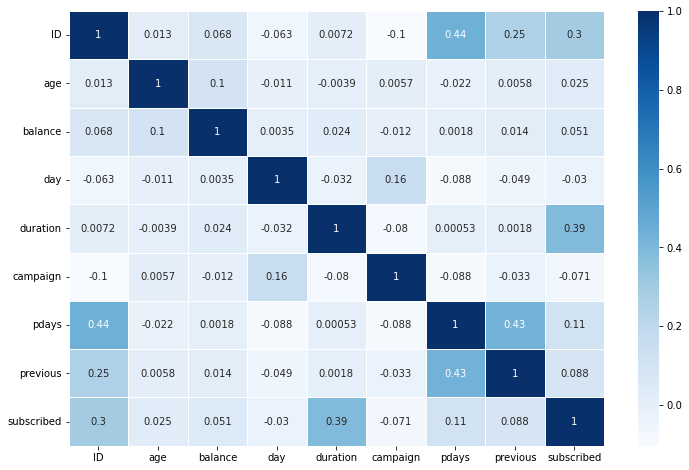

In [85]:
# Generate a heatmap to identify the correlation
corr = df.corr()
fig = plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap = 'Blues', linewidth = 0.5, annot = True)

Observation:
From the above correlation plot, it is observed that duration of call is correlated well with the target varibale that any other independent variables.

In [86]:
df['subscribed'].replace(0, 'no', inplace = True)
df['subscribed'].replace(1, 'yes', inplace = True)

Logistic Regression Algorithm

In [87]:
#Extracting Independent and Dependent variables from train and test datasets repectively.
x_df = df.drop('subscribed', axis = 1)
y_df = df['subscribed']
# Getting dummies to convert Categorical variables into columns.
x_df = pd.get_dummies(x_df)
df1 = pd.get_dummies(df1)
x_df.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [89]:
y_df.head()

0     no
1     no
2     no
3    yes
4     no
Name: subscribed, dtype: object

In [91]:
from sklearn.linear_model import LogisticRegression

In [93]:
# Assigning the object lreg to the class LogisticRegression :
lreg = LogisticRegression()
# Training the model :
lreg.fit(x_df, y_df)

LogisticRegression()

In [94]:
# Predicting the dependent variable for the test dataset :
pred = lreg.predict(df1)

In [95]:
lreg.score(x_df, y_df)

0.8894997946092836

In [97]:
lreg.score(df1, pred)

1.0

As the prediction score is 1, its a good prediction and the Logistic Regression Algorithm can be used for this dataset.